## PREPROCESSING

In [ ]:
#Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import plotly.express as px
import nltk
import re

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Clean up function

#nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
#stopword= set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean(text):
    #Convert to lowercase
    text = str(text).lower()
    #punctuation removal
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    #text = re.sub('[%s]' % re.escape(text.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    #stopword removal
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    #Stemming - Snowball stemmer
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    #Lemmatization - WordNet
    text = lemmatizer.lemmatize(text)
    return text

In [ ]:
#Reading the responses

df = pd.read_csv('https://github.com/prathyuma-08/Sentiment-Analysis/files/9553127/exp.csv')
df.head()

,Review
0,It was good though!
1,Better experience
2,Good only for a certain period of time
3,Waste of time
4,"It was not so great, just another way of learn..."


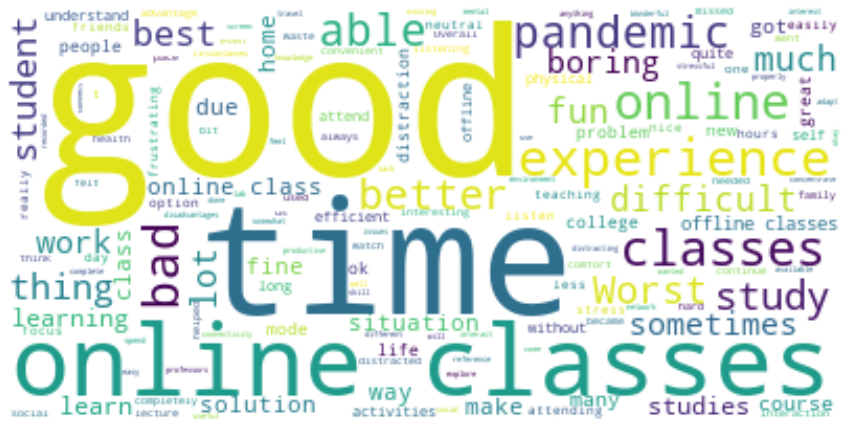

In [ ]:
#Plot the word cloud for the responses

text = " ".join(i for i in df["Review"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## DATA ANNOTATION


VADER LEXICON

In [ ]:
#Marking sentiments using the Vader lexicon

nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Review"]]
df = df[["Review", "Positive", "Negative", "Neutral"]]
print(df.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                              Review  Positive  Negative  \
0                                It was good though!     0.516     0.000   
1                                  Better experience     0.744     0.000   
2             Good only for a certain period of time     0.500     0.000   
3                                      Waste of time     0.000     0.583   
4  It was not so great, just another way of learn...     0.000     0.256   

   Neutral  
0    0.484  
1    0.256  
2    0.500  
3    0.417  
4    0.744  


In [ ]:
#Function to classify the sentiments

def senti(row):
  if row['Positive']>=row['Negative'] and row['Positive']>=row['Neutral']:
    return "Positive"
  if row['Negative']>=row['Positive'] and row['Negative']>=row['Neutral']:
    return "Negative"
  if row['Neutral']>=row['Positive'] and row['Neutral']>=row['Negative']:
    return "Neutral"

In [ ]:
#After applyting the sentiment function

df['Sentiment_vader'] = df.apply(lambda row: senti(row), axis=1)
df.head()

,Review,Positive,Negative,Neutral,Sentiment_vader
0,It was good though!,0.516,0.000,0.484,Positive
1,Better experience,0.744,0.000,0.256,Positive
2,Good only for a certain period of time,0.500,0.000,0.500,Positive
3,Waste of time,0.000,0.583,0.417,Negative
4,"It was not so great, just another way of learn...",0.000,0.256,0.744,Neutral


In [ ]:
#Count the number of sentiments in each

df['Sentiment_vader'].value_counts()

Neutral     187
Positive     69
Negative     45
Name: Sentiment_vader, dtype: int64

In [ ]:
mask1 = df['Sentiment_vader']=="Positive"
mask2 = df['Sentiment_vader']=="Negative"
mask3 = df['Sentiment_vader']=="Neutral"
df_pos = df[mask1]
df_neg = df[mask2]
df_neu = df[mask3]

In [ ]:
print(df_pos.shape)
print(df_neg.shape)
print(df_neu.shape)

(69, 5)
(45, 5)
(187, 5)


Text(0.5, 1.0, 'NEUTRAL WORDS')

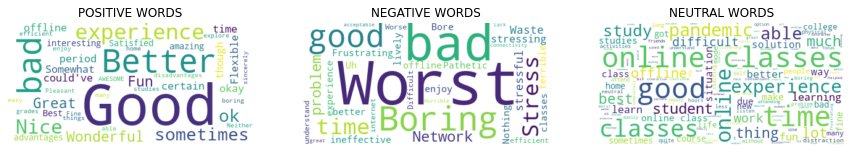

In [ ]:
#VADER word clouds

text_pos = " ".join(i for i in df_pos["Review"])
text_neg = " ".join(i for i in df_neg["Review"])
text_neu = " ".join(i for i in df_neu["Review"])
stopwords = set(STOPWORDS)
wordcloud1 = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text_pos)
wordcloud2 = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text_neg)
wordcloud3 = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text_neu)
fig, ax = plt.subplots(ncols=3, figsize=(15,10))
ax[0].imshow(wordcloud1, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title("POSITIVE WORDS")
ax[1].imshow(wordcloud2, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title("NEGATIVE WORDS")
ax[2].imshow(wordcloud3, interpolation='bilinear')
ax[2].axis("off")
ax[2].set_title("NEUTRAL WORDS")

TEXTBLOB

In [ ]:
from textblob import TextBlob

In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
   return TextBlob(text).sentiment.polarity

def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

In [ ]:
df['subjectivity'] = df['Review'].apply(getSubjectivity)
df['polarity'] = df['Review'].apply(getPolarity)

In [ ]:
df['Sentiment_tb'] = df['polarity'].apply(getAnalysis)

df.head()

,Review,Positive,Negative,Neutral,Sentiment_vader,subjectivity,polarity,Sentiment_tb
0,It was good though!,0.516,0.000,0.484,Positive,0.60000,0.875000,Positive
1,Better experience,0.744,0.000,0.256,Positive,0.50000,0.500000,Positive
2,Good only for a certain period of time,0.500,0.000,0.500,Positive,0.72381,0.304762,Positive
3,Waste of time,0.000,0.583,0.417,Negative,0.00000,-0.200000,Negative
4,"It was not so great, just another way of learn...",0.000,0.256,0.744,Neutral,0.75000,0.800000,Positive


In [ ]:
df['Sentiment_tb'].value_counts()

Positive    192
Negative     73
Neutral      36
Name: Sentiment_tb, dtype: int64

In [ ]:
mask1 = df['Sentiment_tb']=="Positive"
mask2 = df['Sentiment_tb']=="Negative"
mask3 = df['Sentiment_tb']=="Neutral"
df_pos = df[mask1]
df_neg = df[mask2]
df_neu = df[mask3]

Text(0.5, 1.0, 'NEUTRAL WORDS')

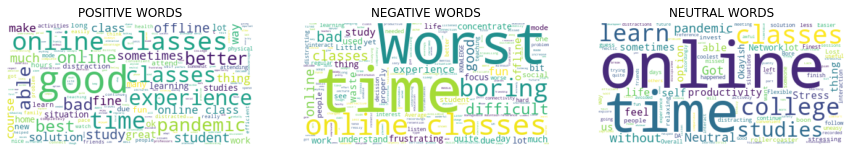

In [ ]:
#TextBlob word clouds

text_pos = " ".join(i for i in df_pos["Review"])
text_neg = " ".join(i for i in df_neg["Review"])
text_neu = " ".join(i for i in df_neu["Review"])
stopwords = set(STOPWORDS)
wordcloud1 = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text_pos)
wordcloud2 = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text_neg)
wordcloud3 = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text_neu)
fig, ax = plt.subplots(ncols=3, figsize=(15,10))
ax[0].imshow(wordcloud1, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title("POSITIVE WORDS")
ax[1].imshow(wordcloud2, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title("NEGATIVE WORDS")
ax[2].imshow(wordcloud3, interpolation='bilinear')
ax[2].axis("off")
ax[2].set_title("NEUTRAL WORDS")

## FEATURE EXTRACTION

In [ ]:
#Importing libraries

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Creating train and test splits

X = df['Review']
y_vader = df['Sentiment_vader']
y_tb = df['Sentiment_tb']
X_train_vader, X_test_vader, y_train_vader, y_test_vader = train_test_split(X,y_vader,random_state=11)
X_train_tb, X_test_tb, y_train_tb, y_test_tb = train_test_split(X,y_tb,random_state=11)

In [ ]:
X_train_vader.shape

(225,)

In [ ]:
y_test_tb.shape

(76,)

COUNTER VECTORIZER WITH VADER LEXICON

In [ ]:
#Using the Count Vectorizer to extract features
cv_vader = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train_vader)
cv_vader.get_feature_names_out()[::100]

array(['able', 'studies'], dtype=object)

In [ ]:
#Vectorizing the X_train

X_train_vader_cv = cv_vader.transform(X_train_vader)
X_train_vader_cv

<225x134 sparse matrix of type '<class 'numpy.int64'>'
	with 1825 stored elements in Compressed Sparse Row format>

COUNTER VECTORIZER WITH TEXTBLOB

In [ ]:
cv_tb = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train_tb)
cv_tb.get_feature_names_out()[::100]

array(['able', 'studies'], dtype=object)

In [ ]:
X_train_tb_cv = cv_tb.transform(X_train_tb)
X_train_tb_cv

<225x134 sparse matrix of type '<class 'numpy.int64'>'
	with 1825 stored elements in Compressed Sparse Row format>

TFIDF VECTORIZER WITH VADER LEXICON

In [ ]:
#TFIDF to extract features

tf_vader = TfidfVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train_vader)
len(tf_vader.get_feature_names_out())

134

In [ ]:
#Train x using tfidf

X_train_vader_tf = tf_vader.transform(X_train_vader)
X_train_vader_tf

<225x134 sparse matrix of type '<class 'numpy.float64'>'
	with 1825 stored elements in Compressed Sparse Row format>

TFIDF VECTORIZER WITH TEXTBLOB

In [ ]:
tf_tb = TfidfVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train_tb)
len(tf_tb.get_feature_names_out())

134

In [ ]:
X_train_tb_tf = tf_tb.transform(X_train_vader)
X_train_tb_tf

<225x134 sparse matrix of type '<class 'numpy.float64'>'
	with 1825 stored elements in Compressed Sparse Row format>

## LOGISTIC REGRESSION

In [ ]:
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score,precision_score,recall_score

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [ ]:
#Vader with count vectorizer
lr1 = log_reg.fit(X_train_vader_cv,y_train_vader)
predictions = lr1.predict_proba(cv_vader.transform(X_test_vader))
lr1 = roc_auc_score(y_test_vader,predictions,multi_class='ovo')
print(lr1)

0.8641612200435729


In [ ]:
#Textblob with count vectorizer

lr2 = log_reg.fit(X_train_tb_cv,y_train_tb)
predictions = lr2.predict_proba(cv_tb.transform(X_test_tb))
lr2 = roc_auc_score(y_test_tb,predictions,multi_class='ovo')
print(lr2)

0.7729780070205603


In [ ]:
#Vader with tfidf vectorizer
lr3 = log_reg.fit(X_train_vader_tf,y_train_vader)
predictions = lr3.predict_proba(tf_vader.transform(X_test_vader))
lr3 = roc_auc_score(y_test_vader,predictions,multi_class='ovo')
print(lr3)

0.8618269530034235


In [ ]:
#Textblob with tfidf vectorizer
lr4 = log_reg.fit(X_train_tb_tf,y_train_tb)
predictions = lr4.predict_proba(tf_tb.transform(X_test_tb))
lr4 = roc_auc_score(y_test_tb,predictions,multi_class='ovo')
print(lr4)

0.7575936671681353


## SUPPORT VECTOR MACHINE

In [ ]:
from sklearn import svm

svm = svm.SVC()

In [ ]:
#Vader with count vectorizer
svm1 = svm.fit(X_train_vader_cv,y_train_vader)
predictions = svm1.predict(cv_vader.transform(X_test_vader))
svm1 = accuracy_score(y_test_vader,predictions)
print(svm1)

0.7105263157894737


In [ ]:
#Textblob with count vectorizer
svm2 = svm.fit(X_train_tb_cv,y_train_tb)
predictions = svm2.predict(cv_tb.transform(X_test_tb))
svm2 = accuracy_score(y_test_tb,predictions)
print(svm2)

0.7105263157894737


In [ ]:
#Vader with tfidf vectorizer
svm3 = svm.fit(X_train_vader_tf,y_train_vader)
predictions = svm3.predict(tf_vader.transform(X_test_vader))
svm3 = accuracy_score(y_test_vader,predictions)
print(svm3)

0.7368421052631579


In [ ]:
#Textblob with tfidf vectorizer
svm4 = svm.fit(X_train_tb_tf,y_train_tb)
predictions = svm4.predict(tf_tb.transform(X_test_vader))
svm4 = accuracy_score(y_test_tb,predictions)
print(svm4)

0.7368421052631579


## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [ ]:
#Vader with count vectorizer
rf1 = rf.fit(X_train_vader_cv,y_train_vader)
predictions = rf1.predict(cv_vader.transform(X_test_vader))
rf1 = accuracy_score(y_test_vader,predictions)
print(rf1)

0.7236842105263158


In [ ]:
#Textblob with count vectorizer
rf2 = rf.fit(X_train_tb_cv,y_train_tb)
predictions = rf2.predict(cv_tb.transform(X_test_tb))
rf2 = accuracy_score(y_test_tb,predictions)
print(rf2)

0.7236842105263158


In [ ]:
#Vader with tfidf vectorizer
rf3 = rf.fit(X_train_vader_tf,y_train_vader)
predictions = rf3.predict(tf_vader.transform(X_test_vader))
rf3 = accuracy_score(y_test_vader,predictions)
print(rf3)

0.7368421052631579


In [ ]:
#Textblob with tfidf vectorizer
rf4 = rf.fit(X_train_tb_tf,y_train_tb)
predictions = rf4.predict(tf_tb.transform(X_test_vader))
rf4 = accuracy_score(y_test_tb,predictions)
print(rf4)

0.7894736842105263


## NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [ ]:
#Vader with count vectorizer
x_train = X_train_vader_cv.toarray()
x_test = cv_vader.transform(X_test_vader).toarray()
nb1 = nb.fit(x_train,y_train_vader)
predictions = nb1.predict(x_test)
nb1 = accuracy_score(y_test_vader,predictions)
print(nb1)

0.6578947368421053


In [ ]:
#Textblob with count vectorizer
x_train = X_train_tb_cv.toarray()
x_test = cv_tb.transform(X_test_tb).toarray()
nb2 = nb.fit(x_train,y_train_tb)
predictions = nb2.predict(x_test)
nb2 = accuracy_score(y_test_tb,predictions)
print(nb2)

0.4868421052631579


In [ ]:
#Vader with tfidf vectorizer
x_train = X_train_vader_tf.toarray()
x_test = tf_vader.transform(X_test_vader).toarray()
nb3 = nb.fit(x_train,y_train_vader)
predictions = nb3.predict(x_test)
nb3 = accuracy_score(y_test_vader,predictions)
print(nb3)

0.6578947368421053


In [ ]:
#Textblob with tfidf vectorizer
x_train = X_train_tb_tf.toarray()
x_test = tf_tb.transform(X_test_vader).toarray()
nb4 = nb.fit(x_train,y_train_tb)
predictions = nb4.predict(x_test)
nb4 = accuracy_score(y_test_tb,predictions)
print(nb4)

0.5394736842105263


## MULTI LAYER PERCEPTRON

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=500)

In [ ]:
#Vader with count vectorizer
mlp1 = mlp.fit(X_train_vader_cv,y_train_vader)
predictions = mlp1.predict(cv_vader.transform(X_test_vader))
mlp1 = accuracy_score(y_test_vader,predictions)
print(mlp1)

0.7236842105263158


In [ ]:
#Textblob with count vectorizer
mlp2 = mlp.fit(X_train_tb_cv,y_train_tb)
predictions = mlp2.predict(cv_tb.transform(X_test_tb))
mlp2 = accuracy_score(y_test_tb,predictions)
print(mlp2)

0.75


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
#Vader with tfidf vectorizer
mlp3 = mlp.fit(X_train_vader_tf,y_train_vader)
predictions = mlp3.predict(tf_vader.transform(X_test_vader))
mlp3 = accuracy_score(y_test_vader,predictions)
print(mlp3)

0.75


In [ ]:
#Textblob with tfidf vectorizer
mlp4 = mlp.fit(X_train_tb_tf,y_train_tb)
predictions = mlp4.predict(tf_tb.transform(X_test_vader))
mlp4 = accuracy_score(y_test_tb,predictions)
print(mlp4)

0.6710526315789473


## VISUALIZATION

In [ ]:
accuracy = {
    'Classifier': ['Logistic Regression','Support Vector Machine','Random Forest','Naive Bayes','Multi layer perceptron'],
    'Vader with Count vectorizer':[lr1,svm1,rf1,nb1,mlp1],
    'Textblob with Count vectorizer':[lr2,svm2,rf2,nb2,mlp2],
    'Vader with TFIDF vectorizer':[lr3,svm3,rf3,nb3,mlp3],
    'Textblob with TFIDF vectorizer':[lr4,svm4,rf4,nb4,mlp4]
}

accuracy = pd.DataFrame(accuracy)
accuracy

,Classifier,Vader with Count vectorizer,Textblob with Count vectorizer,Vader with TFIDF vectorizer,Textblob with TFIDF vectorizer
0,Logistic Regression,0.864161,0.772978,0.861827,0.757594
1,Support Vector Machine,0.710526,0.710526,0.736842,0.736842
2,Random Forest,0.723684,0.723684,0.736842,0.789474
3,Naive Bayes,0.657895,0.486842,0.657895,0.539474
4,Multi layer perceptron,0.723684,0.750000,0.750000,0.671053


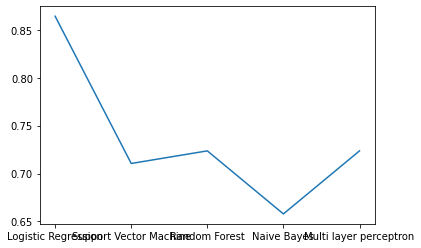

In [ ]:
import matplotlib.pyplot as plt

plt.plot(accuracy['Classifier'],accuracy['Vader with Count vectorizer'])
plt.show()

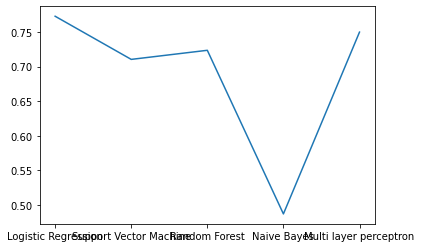

In [ ]:
plt.plot(accuracy['Classifier'],accuracy['Textblob with Count vectorizer'])
plt.show()

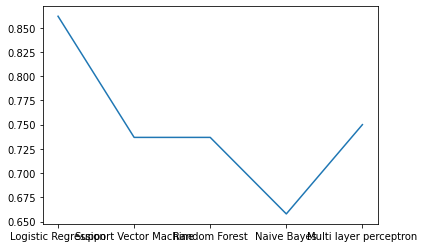

In [ ]:
plt.plot(accuracy['Classifier'],accuracy['Vader with TFIDF vectorizer'])
plt.show()

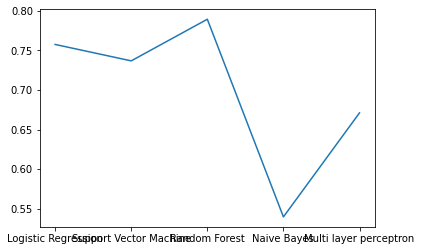

In [ ]:
plt.plot(accuracy['Classifier'],accuracy['Textblob with TFIDF vectorizer'])
plt.show()

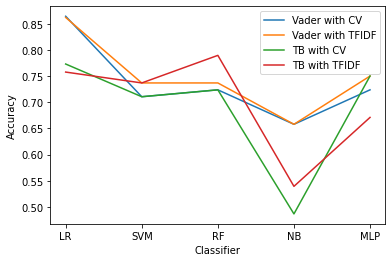

In [ ]:
plt.plot(accuracy['Classifier'], accuracy['Vader with Count vectorizer'], label = "Vader with CV")
plt.plot(accuracy['Classifier'], accuracy['Vader with TFIDF vectorizer'], label = "Vader with TFIDF")
plt.plot(accuracy['Classifier'], accuracy['Textblob with Count vectorizer'], label = "TB with CV")
plt.plot(accuracy['Classifier'], accuracy['Textblob with TFIDF vectorizer'], label = "TB with TFIDF")
plt.legend()
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.xticks(accuracy['Classifier'], ['LR','SVM','RF','NB','MLP'])
plt.show()